<a href="https://colab.research.google.com/github/temesgen0/Customer_Churn_Prediction/blob/main/ChurnCustomers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning, Exploratory Data Analysis and Model Training (machine learning) with Pandas and scikit-learn on Customers Churn

**About the Analysis:** The primary purpose of this kernel is to practice and enhance my skills in data analysis and machine learning.

This analysis focuses on the behavior of telecom customers who are more likely to leave the platform. I intend to find out the most striking behavior of customers through EDA and later on use some of the predictive analytics techniques to determine the customers who are most likely to churn.

**About the data:**

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

I used the data [sets](https://www.kaggle.com/datasets/samkayyali/wa-fnusec-telcocustomerchurn) available and began the process of data cleaning followed by Exploratory data analysis (EDA) and Model Training

## Import Library

In [1]:
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# System and Utility Libraries
import os                               # Operating system functions
import zipfile                          # Reading and writing ZIP archives


## Load and Preprocessing datasets

In [2]:
os.environ['KAGGLE_USERNAME'] = 'temesgenazezew'  # Set your Kaggle username as an environment variable
os.environ['KAGGLE_KEY'] = 'a3402e9e1d8c7af0d485a32e9a7f5218'  # Set your Kaggle API key as an environment variable

!kaggle datasets download -d samkayyali/wa-fnusec-telcocustomerchurn  # Download the 'telcocustomerchurn' dataset from Kaggle


Dataset URL: https://www.kaggle.com/datasets/samkayyali/wa-fnusec-telcocustomerchurn
License(s): CC0-1.0
  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 77.2MB/s]


###Extract the Zip file

In [3]:
zip_file_path = "wa-fnusec-telcocustomerchurn.zip"  # Update with the actual path to your ZIP file

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall("telcocustomerchurn")  # Update "destination_directory" with the desired directory path


### Load data

In [4]:
df_customer = pd.read_csv('telcocustomerchurn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(df_customer.head())
print("dataset shape: ", df_customer.shape)

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

very good !  
we have above 7000 customers entry with its 21 attributes

In [5]:
# Display column names and data types
column_info = pd.DataFrame({
    'Column Name': df_customer.columns,
    'Data Type': df_customer.dtypes
})

# Display the DataFrame
print(column_info)


                       Column Name Data Type
customerID              customerID    object
gender                      gender    object
SeniorCitizen        SeniorCitizen     int64
Partner                    Partner    object
Dependents              Dependents    object
tenure                      tenure     int64
PhoneService          PhoneService    object
MultipleLines        MultipleLines    object
InternetService    InternetService    object
OnlineSecurity      OnlineSecurity    object
OnlineBackup          OnlineBackup    object
DeviceProtection  DeviceProtection    object
TechSupport            TechSupport    object
StreamingTV            StreamingTV    object
StreamingMovies    StreamingMovies    object
Contract                  Contract    object
PaperlessBilling  PaperlessBilling    object
PaymentMethod        PaymentMethod    object
MonthlyCharges      MonthlyCharges   float64
TotalCharges          TotalCharges    object
Churn                        Churn    object


### Let's Convert data types

In [6]:
# Convert categorical `object` columns to `category` type
for col in df_customer.select_dtypes(include='object').columns:
    # Convert to category if it has fewer unique values than a threshold (indicative of categorical data)
    if df_customer[col].nunique() < 10:
        df_customer[col] = df_customer[col].astype('category')
    else:
        df_customer[col] = df_customer[col].astype(str)  # Convert the rest to string type

# Convert 'TotalCharges' to float, handling any potential non-numeric values
df_customer['TotalCharges'] = pd.to_numeric(df_customer['TotalCharges'], errors='coerce')
# Convert 'SeniorCitizen' to categorical
df_customer['SeniorCitizen'] = df_customer['SeniorCitizen'].astype('category')

# Verify the new data types
print(df_customer.dtypes)


customerID            object
gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object


fantastic!  
we have:-
category:17 and  numeric: 3 data types

### Let's check the missing value

In [ ]:
# Create a new DataFrame to store missing values and unique counts
missing_and_uniques = pd.DataFrame({
    'Missing': df_customer.isnull().sum(),              # Count of missing values
    'Uniques': df_customer.nunique()                    # Count of unique values
})

# Display the result
print(missing_and_uniques)


                  Missing  Uniques
customerID              0     7043
gender                  0        2
SeniorCitizen           0        2
Partner                 0        2
Dependents              0        2
tenure                  0       73
PhoneService            0        2
MultipleLines           0        3
InternetService         0        3
OnlineSecurity          0        3
OnlineBackup            0        3
DeviceProtection        0        3
TechSupport             0        3
StreamingTV             0        3
StreamingMovies         0        3
Contract                0        3
PaperlessBilling        0        2
PaymentMethod           0        4
MonthlyCharges          0     1585
TotalCharges           11     6530
Churn                   0        2


Nice! the total changes have 11 missing values let's handle them

In [7]:
# Fill NaN values in 'TotalCharges' with the mean of the column
df_customer['TotalCharges'].fillna(df_customer['TotalCharges'].mean(), inplace=True)


<ipython-input-7-a84655e15bad>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_customer['TotalCharges'].fillna(df_customer['TotalCharges'].mean(), inplace=True)


Very interesting.

We can see that we have one entry for each CustomerId  
The dataset don't have missing values  
Some features are categorical  
The target the we will use to guide the exploration is Churn  

Let's investigate the data further.
I will get all categorical features and see their distribution by the target
I will calculate the Churn Rate for each value in categories

## EDA

### Basic Statistics and Data Distribution

In [ ]:
# Summart statistics for numerical columns
df_customer.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2265.000258
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1400.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


### Visualize the Target Variable (Churn) Distripution

CUSTOMERS %CHURN:
Churn
No     73.46
Yes    26.54
Name: proportion, dtype: float64


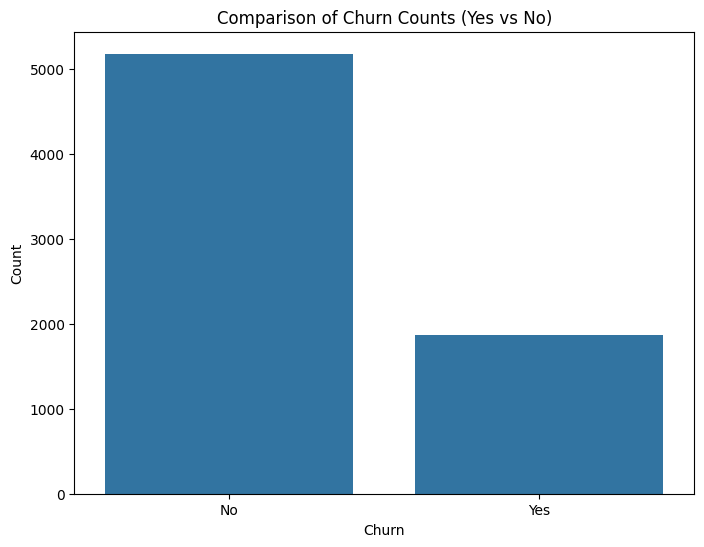

In [ ]:
print("CUSTOMERS %CHURN:")
print(round(df_customer['Churn'].value_counts(normalize=True) * 100,2))
# Set plot size
plt.figure(figsize=(8, 6))

# Create a count plot for the Churn column
sns.countplot(data=df_customer, x='Churn')

# Set plot labels and title
plt.title('Comparison of Churn Counts (Yes vs No)')
plt.xlabel('Churn')
plt.ylabel('Count')

# Show plot
plt.show()


We have 26.5% of our data that is about the Churned.

### Analyse Numeric Features
"Do customers with the minimum value of tenuremhave a higher likelihood of churning? Let's investigate this visually."

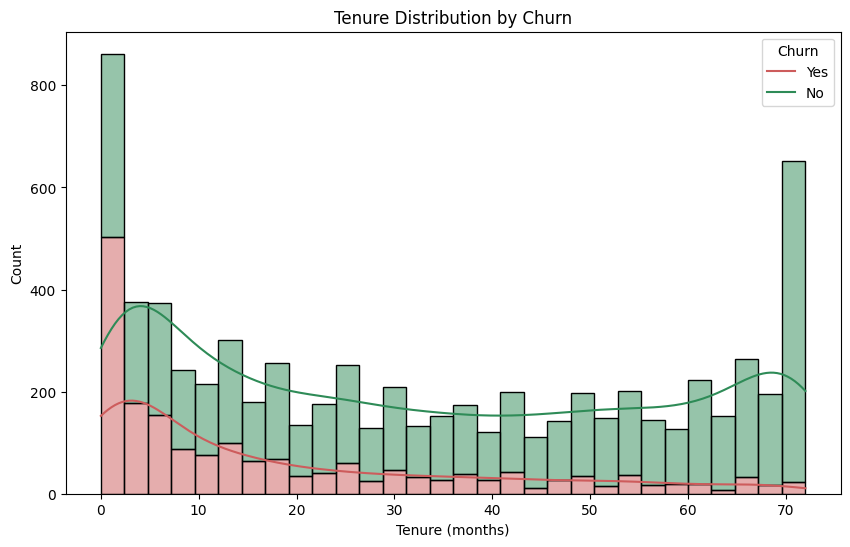

In [ ]:

plt.figure(figsize=(10, 6))

# Plot histogram with seaborn for 'tenure' by 'Churn' in one chart
sns.histplot(data=df_customer, x='tenure', hue='Churn', kde=True, bins=30, palette=['seagreen', 'indianred'], multiple='stack')

# Set plot labels and title
plt.title('Tenure Distribution by Churn')
plt.xlabel('Tenure (months)')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['Yes', 'No'])
plt.show()


In [ ]:
print("proportion for customers with a tenure of over 70 months ", round(df_customer[df_customer["tenure"] >= 70]["Churn"].value_counts(normalize=True)*100,2))

print("proportion for customers with a tenure of over 60 months  ", round(df_customer[df_customer["tenure"] >= 60]["Churn"].value_counts(normalize=True)*100,2))
print("proportion for customers with a tenure of below 60 months  ", round(df_customer[df_customer["tenure"] < 60]["Churn"].value_counts(normalize=True)*100,2))
print("proportion for customers with a tenure of below 10 months ", round(df_customer[df_customer["tenure"] <= 10]["Churn"].value_counts(normalize=True)*100,2))


proportion for customers with a tenure of over 70 months  Churn
No     96.47
Yes     3.53
Name: proportion, dtype: float64
proportion for customers with a tenure of over 60 months   Churn
No     93.32
Yes     6.68
Name: proportion, dtype: float64
proportion for customers with a tenure of below 60 months   Churn
No     68.17
Yes    31.83
Name: proportion, dtype: float64
proportion for customers with a tenure of below 10 months  Churn
No     50.86
Yes    49.14
Name: proportion, dtype: float64


Very interesting!  

Here’s a detailed interpretation:  
The histogram above shows the distribution of customer tenure (in months) segmented by their churn status (`Churn = Yes` or `Churn = No`).

1. **High Churn for Low Tenure**: A large number of customers with low tenure (0–10 months) have churned (shown in red). This suggests that many customers leave early in their subscription period, indicating potential dissatisfaction or unmet expectations in the initial months.

2. **Lower Churn for Longer Tenure**: As tenure increases, the proportion of customers who churn (red bars) decreases. Most customers with a tenure of over 60 months (5 years) do not churn, which suggests that long-term customers are more likely to remain loyal.

3. **Peak at Maximum Tenure**: There is a notable peak around the maximum tenure (near 70 months) where churn is very low. This may indicate a set of long-term, highly engaged customers who are more satisfied with the service.

4. **Tenure and Stability**: The decreasing churn rate as tenure increases might imply that customers who stay longer are more committed and satisfied, potentially due to factors like accumulated benefits, habit, or strong relationships with the company.

#### Key Takeaways:
- **Early Intervention**: The company should focus on retaining customers within the first year by addressing potential issues that new customers may face.
- **Loyalty Programs**: Implementing loyalty programs or incentives for customers as they approach higher tenure levels could further reduce churn.
- **Customer Feedback**: It may also be valuable to gather feedback from customers in the early months to understand the causes of early churn.

This histogram highlights the importance of tenure in understanding churn patterns and suggests that longer-tenured customers are more stable and less likely to leave.

###Categorical Feature analysis

<ipython-input-27-87c53938a9ab>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_counts = df_customer.groupby([feature, 'Churn']).size().unstack()
<ipython-input-27-87c53938a9ab>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_counts = df_customer.groupby([feature, 'Churn']).size().unstack()
<ipython-input-27-87c53938a9ab>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_counts = df_customer.groupby

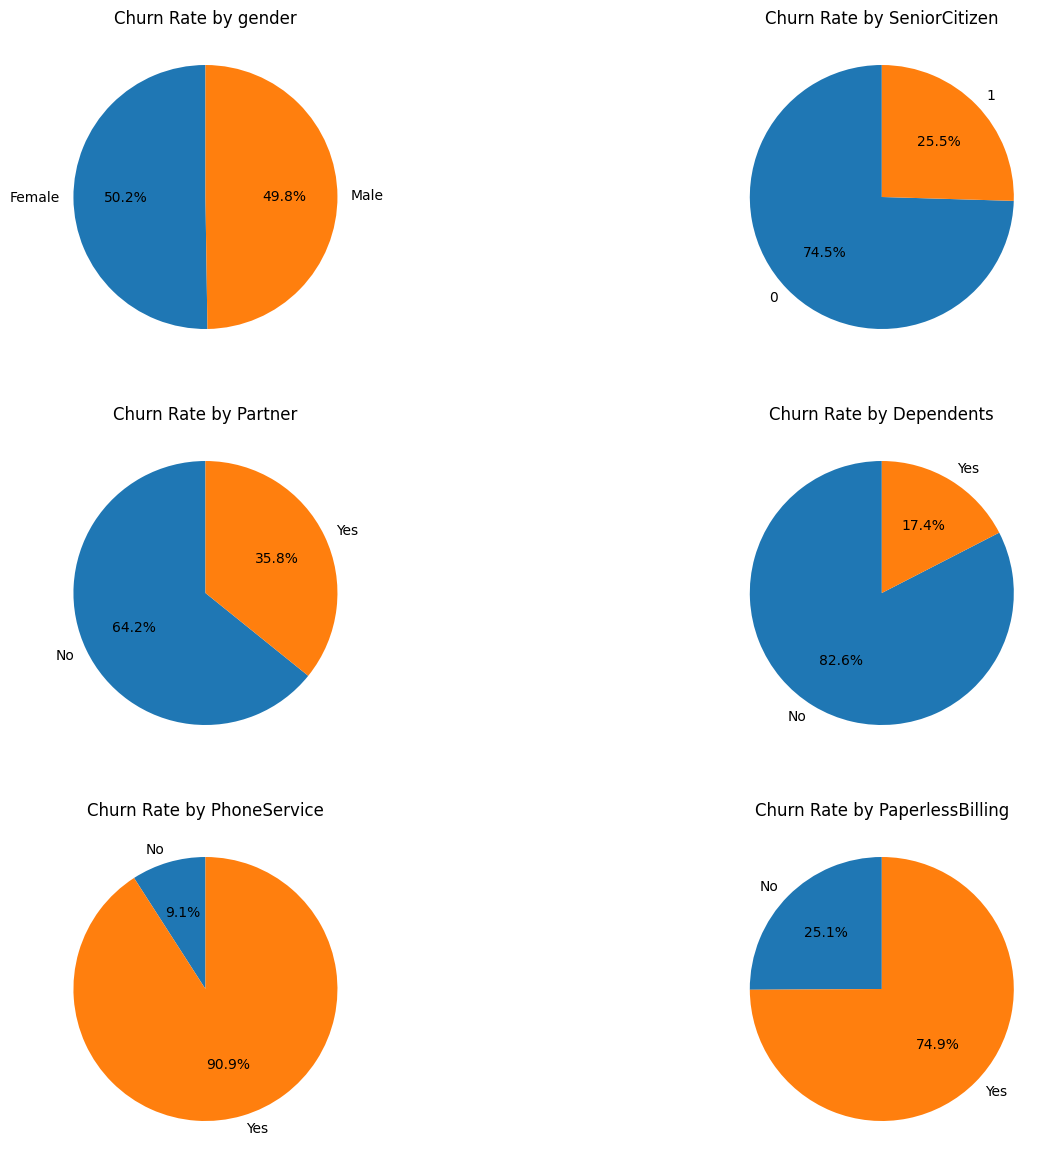

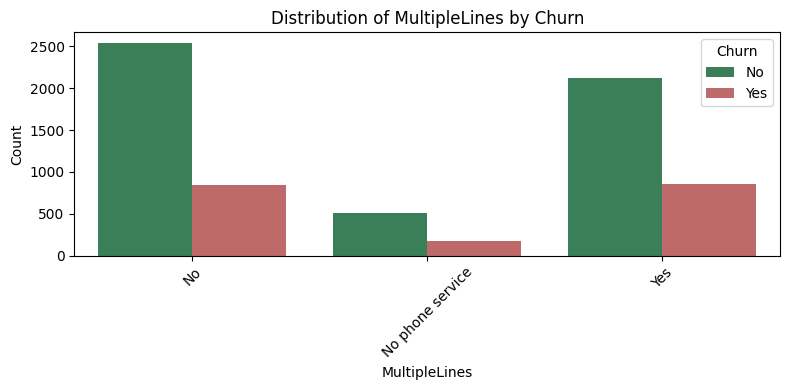

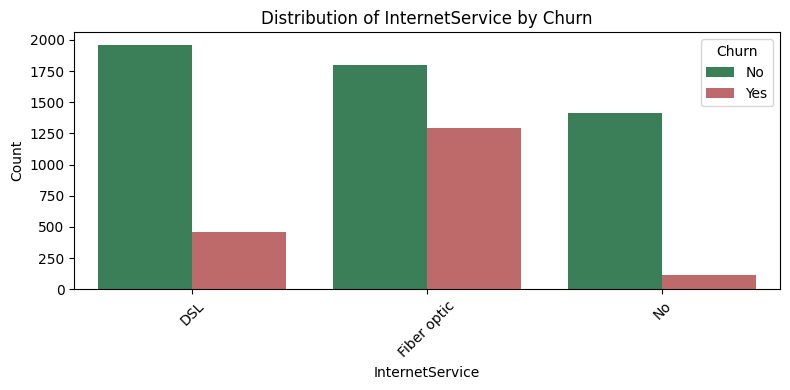

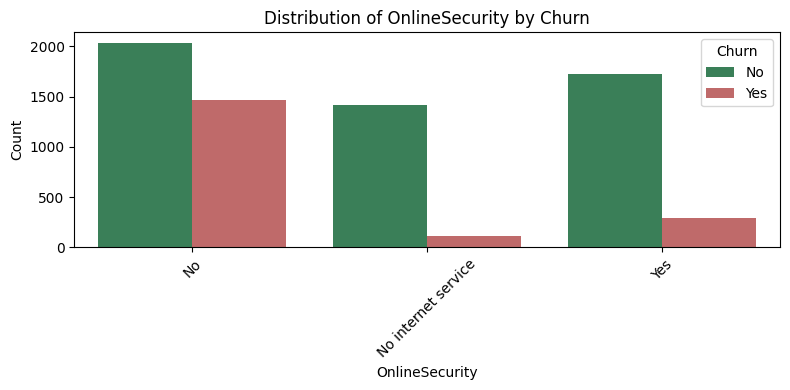

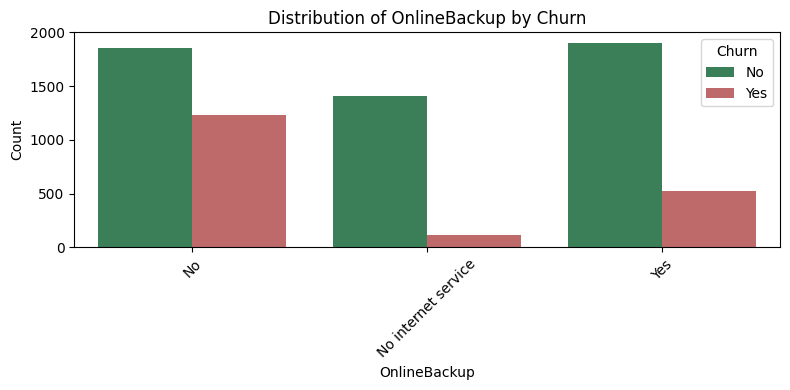

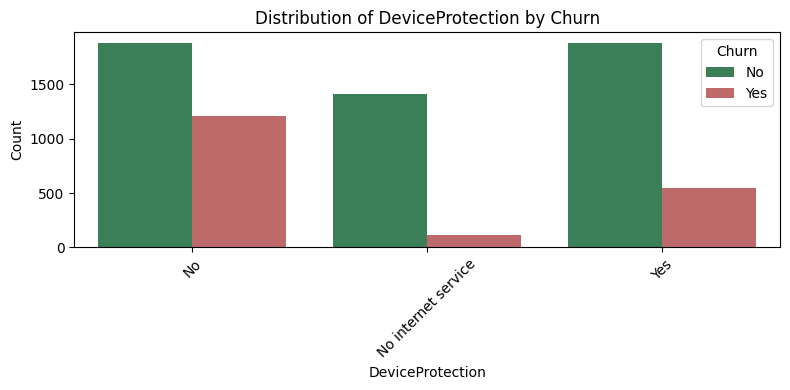

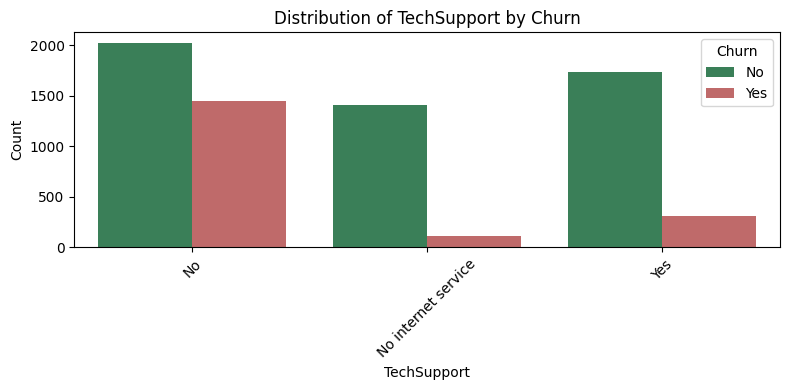

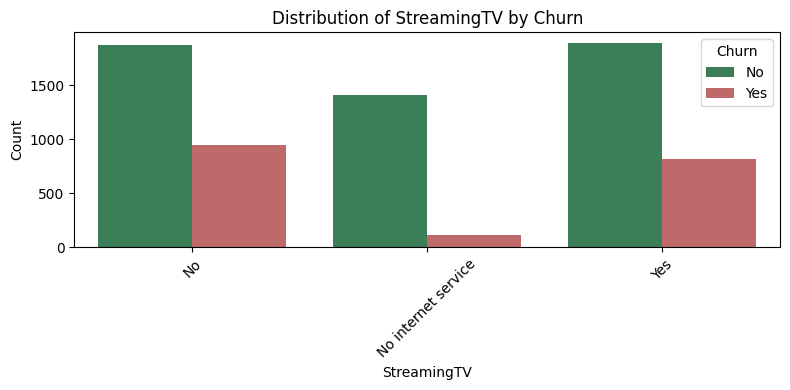

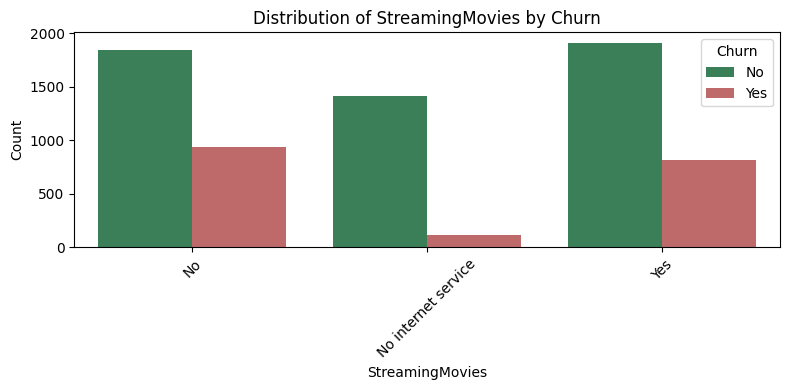

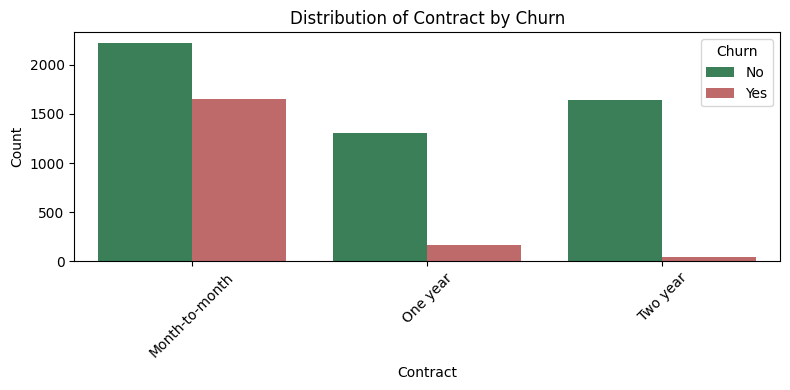

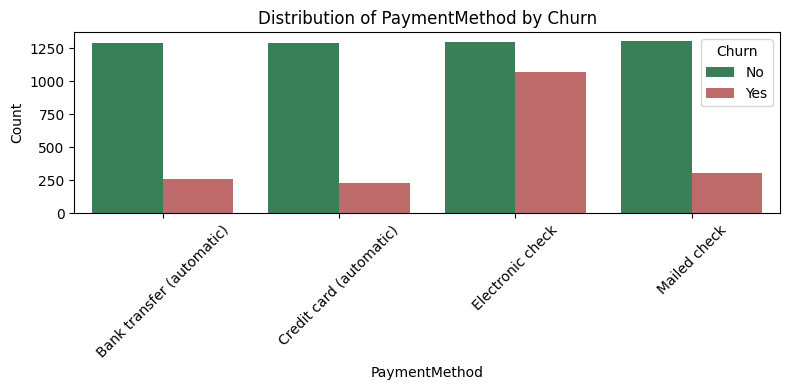

In [ ]:
# List of categorical features excluding the target 'Churn'
categorical_features = df_customer.select_dtypes(include='category').columns.drop('Churn')
# Separate features based on the number of unique categories
binary_features = [feature for feature in categorical_features if df_customer[feature].nunique() == 2]
multi_category_features = [feature for feature in categorical_features if df_customer[feature].nunique() > 2]

# Plot binary features as pie charts
plt.figure(figsize=(16, 30))
for i, feature in enumerate(binary_features, 1):
    plt.subplot(len(binary_features), 2, i)
    churn_counts = df_customer.groupby([feature, 'Churn']).size().unstack()
    churn_counts.plot(kind='pie', y='Yes', autopct='%1.1f%%', startangle=90, ax=plt.gca(), legend=False)
    plt.title(f'Churn Rate by {feature}')
    plt.ylabel('')

# Plot multi-category features as bar charts
for i, feature in enumerate(multi_category_features, 1):
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df_customer, x=feature, hue='Churn', palette=['seagreen', 'indianred'])
    plt.title(f'Distribution of {feature} by Churn')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Churn', loc='upper right')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()




The pie charts above show the **churn rate** for different categorical features. Here’s a breakdown of each one:

1. **Churn Rate by Gender**:
   - The churn rate is nearly identical for both genders, with **Female** customers making up **50.2%** and **Male** customers **49.8%**.
   - This indicates that gender does not have a significant influence on customer churn, as the rate is balanced between males and females.

2. **Churn Rate by Senior Citizen**:
   - **25.5%** of the customers who churned are Senior Citizens, while **74.5%** are not.
   - This suggests that while Senior Citizens are a smaller portion of the overall customer base, they may have a higher propensity to churn. Targeted retention efforts could help retain Senior Citizen customers.

3. **Churn Rate by Partner**:
   - Among those who churned, **35.8%** have a partner, while **64.2%** do not.
   - This indicates that customers without a partner are more likely to churn. This could suggest that customers with a partner may be more stable or satisfied with their service, perhaps due to shared usage or dual income.

4. **Churn Rate by Dependents**:
   - **17.4%** of customers who churned have dependents, while **82.6%** do not.
   - This shows that customers without dependents are more likely to churn, potentially because they may be less financially committed or have fewer responsibilities tying them to a service.

5. **Churn Rate by Phone Service**:
   - **90.9%** of those who churned have a phone service, while only **9.1%** do not.
   - This suggests that customers with phone service have a higher churn rate. This could indicate that phone service alone may not be sufficient for customer satisfaction, or that additional services might be required to retain these customers.

6. **Churn Rate by Paperless Billing**:
   - **74.9%** of those who churned use paperless billing, while **25.1%** do not.
   - Customers who opt for paperless billing seem more likely to churn. This could imply that these customers prefer a more modern, digital experience but might still be dissatisfied, indicating an area where service quality improvements could help retain these customers.

#### Key Takeaways:
- **Senior Citizens** and customers without **Dependents** are more prone to churn.
- **Paperless Billing** and having **Phone Service** are also associated with higher churn rates, suggesting areas to focus on for potential improvements or personalized retention strategies.
- **Gender** does not appear to significantly impact churn likelihood, as churn rates are balanced between males and females.

This analysis could guide targeted strategies, such as enhanced service bundles for customers with phone services or incentives for non-Senior Citizens without dependents.

The bar charts above show the churn rate for different categorical features. Here’s a breakdown of each one:

 #### Distribution of InternetService by Churn

**Key Observations:**

1. Fiber Optic and Churn: Customers with Fiber Optic internet service have the highest churn rate. The number of customers who churned with this type of service is significantly higher than those who did not churn.

2. No Internet Service and Churn: Customers with no internet service have the lowest churn rate. The number of customers who churned with no internet service is significantly lower than those who did not churn.

**Possible Insights:**

1. Internet Service Type and Loyalty: The type of internet service seems to be a factor in customer churn. Fiber Optic customers might be more likely to churn compared to DSL customers.

2. Targeted Retention Strategies: Different retention strategies might be needed for different internet service types. For example, offering incentives or special promotions to Fiber Optic customers could help reduce churn.

#### Distribution of Contract by Churn

**Key Observations:**
1. Month-to-Month Contracts and Churn: Customers with month-to-month contracts have the highest churn rate. The number of customers who churned with this type of contract is significantly higher than those who did not churn.

2. Two-Year Contracts and Churn: Customers with two-year contracts exhibit the lowest churn rate. The number of customers who churned with this type of contract is significantly lower than those who did not churn.

**Possible Insights:**

1. Contract Duration and Loyalty: The longer the contract duration, the lower the churn rate. This suggests that customers with longer-term commitments are more likely to stay with the service.

2. Month-to-Month Contracts as a Risk: Month-to-month contracts seem to be a significant factor in customer churn. It might be beneficial to encourage customers to switch to longer-term contracts to reduce churn.

3. Targeted Retention Strategies: Different retention strategies might be needed for different contract types. For example, offering incentives or special promotions to month-to-month customers could help reduce churn.

 #### Distribution of PaymentMethod by Churn

**Key Observations:**

1. Electronic Check and Churn: Customers with Electronic Check payment method have the highest churn rate. The number of customers who churned with this payment method is significantly higher than those who did not churn.

2. Other Payment Methods: Customers with other payment methods (Bank transfer (automatic), Credit card (automatic), and Mailed check) have similar churn rates. The number of customers who churned with these payment methods is relatively low compared to those who did not churn.

**Possible Insights:**

1. Payment Method and Loyalty: The payment method might be a factor in customer churn. Customers with Electronic Check payment method might be more likely to churn compared to those with other payment methods.

2. Targeted Retention Strategies: Different retention strategies might be needed for different payment methods. For example, offering incentives or special promotions to customers with Electronic Check payment method could help reduce churn.


### Bivariate Analysis (Categorical & Numerical Features by Churn)

Churn by Tenure Groups: Create tenure groups (e.g., new, loyal) and calculate the churn rate for each group.
python
Copy code

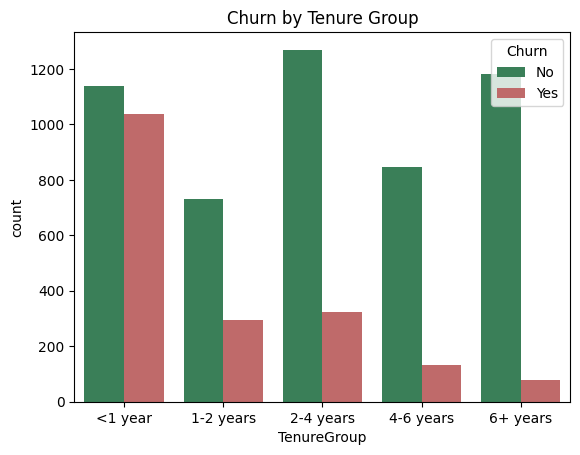

In [ ]:
df_customer['TenureGroup'] = pd.cut(df_customer['tenure'], bins=[0, 12, 24, 48, 62, df_customer['tenure'].max()], labels=['<1 year', '1-2 years', '2-4 years', '4-6 years', '6+ years'])
sns.countplot(data=df_customer, x='TenureGroup', hue='Churn', palette=['seagreen', 'indianred'])
plt.title('Churn by Tenure Group')
plt.show()

Excellent!  
The chart depicts customer churn segmented by tenure group, with the following insights:

1. **Churn Rates**:
   - **<1 year**: High churn rate, nearly equal counts of customers who churned ("Yes") and did not churn ("No").
   - **1-2 years**: Churn rates drop, with more customers staying ("No") than leaving ("Yes").
   - **2-4 years**: The number of customers not churning ("No") significantly increases, with churn ("Yes") being lower.
   - **4-6 years**: Churn ("Yes") continues to decrease, and most customers stay ("No").
   - **6+ years**: The lowest churn rate, with a large number of customers staying ("No") compared to those leaving ("Yes").

**Overall Interpretation**:
- Newer customers (less than 1 year of tenure) have a higher propensity to churn.
- As tenure increases, the likelihood of churn decreases, suggesting that longer-tenured customers are more likely to remain with the company.

Correlation Feature Analysis

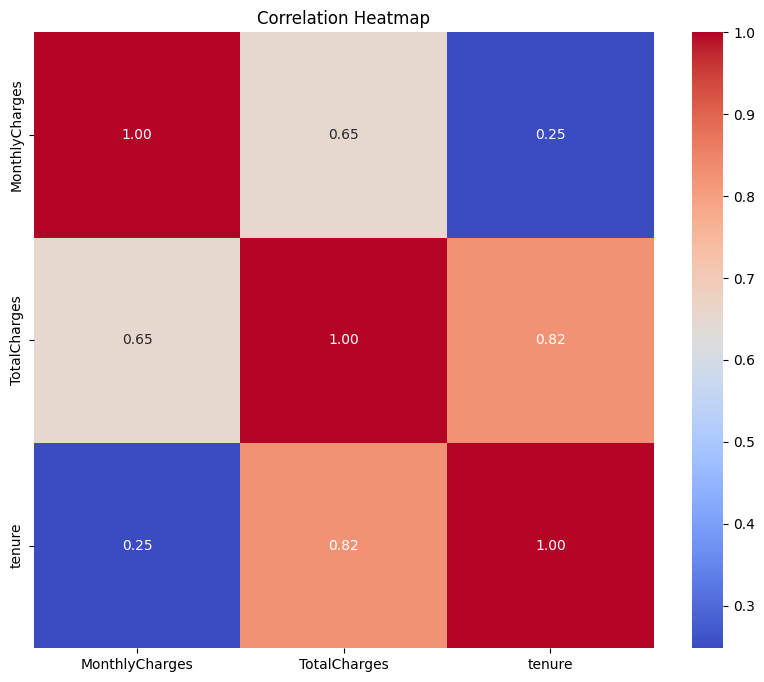

In [ ]:
# Corrrlation Heatmap
numeric_cols=["MonthlyCharges", "TotalCharges", "tenure" ]

plt.figure(figsize=(10,8))
corr_matrix=df_customer[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [8]:
# List of categorical columns excluding 'Churn'
categorical_features = df_customer.select_dtypes(include=['category']).columns.drop('Churn')

# Dictionary to store the results
chi2_results = {}

# Chi-Square test for each categorical column against 'Churn'
for col in categorical_features:
    contingency_table = pd.crosstab(df_customer[col], df_customer['Churn'])  # Create a contingency table
    chi2, p, _, _ = chi2_contingency(contingency_table)    # Perform Chi-Square test
    chi2_results[col] = p                                  # Store the p-value in the dictionary

# Convert results to a DataFrame for easy viewing
chi2_df = pd.DataFrame(list(chi2_results.items()), columns=['Feature', 'P-Value'])
chi2_df['Significant'] = chi2_df['P-Value'] < 0.05  # Add a significance column

# Display the results
print(chi2_df)


             Feature        P-Value  Significant
0             gender   4.865787e-01        False
1      SeniorCitizen   1.510067e-36         True
2            Partner   2.139911e-36         True
3         Dependents   4.924922e-43         True
4       PhoneService   3.387825e-01        False
5      MultipleLines   3.464383e-03         True
6    InternetService  9.571788e-160         True
7     OnlineSecurity  2.661150e-185         True
8       OnlineBackup  2.079759e-131         True
9   DeviceProtection  5.505219e-122         True
10       TechSupport  1.443084e-180         True
11       StreamingTV   5.528994e-82         True
12   StreamingMovies   2.667757e-82         True
13          Contract  5.863038e-258         True
14  PaperlessBilling   4.073355e-58         True
15     PaymentMethod  3.682355e-140         True


# Machine Learning (Customer Churn Model Training)

**Goal:** The primary goal is to predict the probability of a customer churning within a specific timeframe, such as the next month or quarter.  
**Business Impact:** Use predictions to proactively reach out to at-risk customers, reduce churn, and increase customer retention.

## Let's ready the Data to Model Training

### Import Necessary Libraries

In [9]:
#sample oversampling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold
from sklearn.datasets import make_classification


### Separate the Features and Target

In [10]:
# define y and X
y = df_customer['Churn']
X = df_customer.drop(['customerID','Churn'],axis=1)

In [ ]:
y.value_counts()

,count
Churn,
No,5174
Yes,1869


### Split the Data into Train and Test Sets

In [11]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


### Encode Categorical Columns
Binary Encoding (0 and 1): For columns with two categories, encode them with 0 and 1.  
Ordinal Encoding (0, 1, 2, ...): For columns with more than two categories, encode each unique value as a separate integer.  

In [12]:
# Define categorical columns
binary_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']  # Example binary columns
multi_category_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                          'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                          'Contract', 'PaymentMethod']  # Example multi-category columns

# Binary encoding
label_encoder = LabelEncoder()
for col in binary_columns:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

# Multi-category encoding
for col in multi_category_columns:
    X_train[col] = X_train[col].astype('category').cat.codes
    X_test[col] = X_test[col].astype('category').cat.codes


In [13]:
# Encode the 'Churn' column in y_train and y_test
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)  # Fit and transform on the training set
y_test = label_encoder.transform(y_test)        # Transform on the test set only


 ### Standardize the Numeric Columns
Standardize the numeric columns so they have a mean of 0 and standard deviation of 1. This helps certain machine learning models perform better, especially models sensitive to feature scaling.

### Balance the Target Using SMOTE
Apply SMOTE on the training set to balance the target variable. Only do this on the training data to avoid data leakage.


In [ ]:
# Applying SMOTE to the training data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


In [ ]:
# If y_train is an array, convert it to a pandas Series to use value_counts()
y_train_series = pd.Series(y_train)
y_train_series.value_counts()


,count
0,4139
1,4139


### Standardize the Numeric Columns
Standardize the numeric columns so they have a mean of 0 and standard deviation of 1. This helps certain machine learning models perform better, especially models sensitive to feature scaling.

In [14]:
# Define numeric columns
numeric_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Initialize the scaler
scaler = StandardScaler()

# Fit on train, transform both train and test sets
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])


### Summary
We split the data into train and test sets.  
We encoded binary and multi-categorical features.  
We balanced the training data using SMOTE.  
We standardized the numeric features in both train and test sets.   

This data is now ready for model training, which can help to predict churn with a more balanced and well-preprocessed dataset.  

## Model Training

### Train the Logistic Regression Model
Fit the Logistic Regression model to the training data.

In [15]:
# Initialize and fit Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

### Evaluate the Model
Evaluate the model’s performance on the test data.

In [16]:
# Predict on test data
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # For ROC AUC, we need probability scores

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print(f'ROC-AUC Score: {roc_auc:.4f}')


Accuracy: 0.7999
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.65      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409

Confusion Matrix:
[[923 112]
 [170 204]]
ROC-AUC Score: 0.8402


### Hyperparameter Tuning
First, use RandomizedSearchCV to perform a broader search over a random set of hyperparameters, which can be faster and more efficient. Once the best parameters are identified from the randomized search, you can refine the search using GridSearchCV to hone in on the optimal values. Here’s how to implement it:  
#### **Steps**
1. Set up a parameter grid with a broader range for RandomizedSearchCV.
2. Run RandomizedSearchCV to get the best combination of hyperparameters.
3. Refine the parameter grid based on the best parameters found from RandomizedSearchCV.
4. Run GridSearchCV using the refined grid for final tuning.

#### Step 1: Set up a Parameter Grid for RandomizedSearchCV

In [17]:
# Define the parameter grid for RandomizedSearchCV
random_param_grid = {
    'C': np.logspace(-3, 3, 10),       # C values from 0.001 to 1000 (regularization strength)
    'solver': ['lbfgs', 'liblinear', 'saga'],  # Different solvers
    'penalty': ['l2', 'none'],         # Penalty types
    'max_iter': [100, 200, 500, 1000]  # Different max iterations
}

# Initialize RandomizedSearchCV with LogisticRegression
random_search = RandomizedSearchCV(
    estimator=LogisticRegression(),
    param_distributions=random_param_grid,
    n_iter=20,                          # Number of random parameter combinations
    scoring='roc_auc',
    cv=5,                               # 5-fold cross-validation
    random_state=42,
    n_jobs=-1                           # Use all available cores
)

# Fit to the training data
random_search.fit(X_train, y_train)

# Display the best parameters from RandomizedSearchCV
print("Best parameters from RandomizedSearchCV:")
print(random_search.best_params_)


Best parameters from RandomizedSearchCV:
{'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 100, 'C': 46.41588833612773}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

#### Step 2: Refine the Parameter Grid for GridSearchCV
Using the best parameters from RandomizedSearchCV, refine the grid for GridSearchCV. For example, if C was found to be around 1, you might test a narrower range around that value.

In [18]:
# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
# Use the best parameters to refine the grid
refined_param_grid = {
    'C': [0.5, 1, 1.5, 2],              # Narrowed range around the best C value
    'solver': [random_search.best_params_['solver']],  # Use the best solver from RandomizedSearchCV
    'penalty': [random_search.best_params_['penalty']],  # Use the best penalty from RandomizedSearchCV
    'max_iter': [200, 500, 1000]        # Narrowed options for max_iter
}
# Define StratifiedKFold for cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV with LogisticRegression
grid_search = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=refined_param_grid,
    scoring='roc_auc',
    cv=5,                               # 5-fold cross-validation
    n_jobs=-1
)

# Fit to the training data
grid_search.fit(X, y)

# Display the best parameters from GridSearchCV
print("Best parameters from GridSearchCV:")
print(grid_search.best_params_)
print("Best ROC-AUC Score:", grid_search.best_score_)


Best parameters from GridSearchCV:
{'C': 2, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}
Best ROC-AUC Score: 0.92878


#### Step 3: Use the Best Model
The best model found through grid_search can be used for predictions or further evaluation:

In [19]:
# Best model from GridSearchCV
best_model = grid_search.best_estimator_

# Predict on test set
y_pred = best_model.predict(X)
y_proba = best_model.predict_proba(X)[:, 1]

# Evaluate the model

# Accuracy
accuracy = accuracy_score(y, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print("Final Model ROC-AUC Score:", roc_auc_score(y, y_proba))
print("Classification Report:")
print(classification_report(y, y_pred))


Accuracy: 0.8780
Final Model ROC-AUC Score: 0.9353159999999999
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       500
           1       0.89      0.87      0.88       500

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000

